## Method component factualness evaluation

In [1]:
import sys, os, json
from graphs.states import MCState
from main import graph as methodcomp_eval_graph

with open("data/test_factualness_sample.json", "r", encoding="utf-8") as f:
    factualness_data = json.load(f)

# Display the loaded data
print(f"Loaded {len(factualness_data)} items")
print(f"First item keys: {factualness_data[0].keys() if factualness_data else 'No data'}")

Loaded 1 items
First item keys: dict_keys(['id', 'method_component', 'reference'])


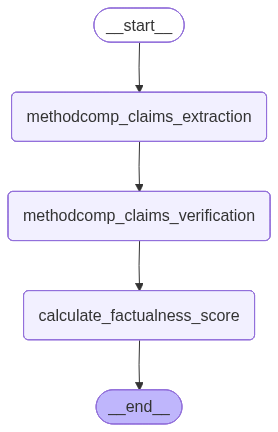

In [2]:
from IPython.display import display, Image
display(Image(methodcomp_eval_graph.get_graph().draw_mermaid_png()))

In [3]:
# Preview data
fact_data_id = 1
fact_input = next((x for x in factualness_data if x["id"] == fact_data_id), None)

print("** method_component **")
print(fact_input['method_component'])
print('===========')
print("** reference **")
print(fact_input['reference'])

** method_component **

1.1 Introduction to OCR technology
OCR(Optical Character Recognition) refers to the automatic recognition of text content in images,
and is one of the important branches of computer vision[4].Traditional OCR adopts pattern
recognition technology, which has many drawbacks such as too many processing links, long process,
poor recognition flexibility and difficult maintenance[5].In recent years, with the rapid development
of deep learning technology, the traditional OCR technology framework has been broken. OCR
technology based on deep learning has gradually become a research hotspot, and is widely used in
many fields such as electronic bill recognition, certificate recognition, license plate recognition,
natural scene text recognition and so on[5]
. Deep learning has strong image feature learning ability,
which optimizes the traditional technical framework to a certain extent and improves the recognition
effect and speed of OCR. Currently, the typical OCR recognit

In [4]:
state : MCState = {
    'micro_credentials':{
        'method_component': {
            'components': fact_input['method_component'],
            'reference': fact_input['reference']
        }
    }
}

In [5]:
result = methodcomp_eval_graph.invoke(state)

In [6]:
result['eval_score']

{'claims': [{'id': 1,
   'claim': 'OCR(Optical Character Recognition) refers to the automatic recognition of text content in images, and is one of the important branches of computer vision',
   'source': 'Hongtao Lu, Mukun Luo. Survey on New Progresses of Deep Learning Based Computer Vision [J]. Journal of Data Acquisition and Processing, 2022, 37(2): 247-278.',
   'support': 'no'},
  {'id': 2,
   'claim': 'Traditional OCR adopts pattern recognition technology, which has many drawbacks such as too many processing links, long process, poor recognition flexibility and difficult maintenance',
   'source': 'Rihua Wang. Research on Key Technologies and Application of Intelligent OCR Recognition Based on Deep Learning [J]. Designing Techniques of Posts and Telecommunications, 2021(08): 20-24.',
   'support': 'no'},
  {'id': 3,
   'claim': 'In recent years, with the rapid development of deep learning technology, the traditional OCR technology framework has been broken.',
   'source': '',
   '